In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sb
import colorcet as cc

In [ ]:
#Dataset is from the glotto project : https://glottolog.org/meta/downloads 

In [2]:
df_languoid = pd.read_csv('languoid_2022.csv')
df_dialects = pd.read_csv('languages_and_dialects_geo_2022.csv')

In [3]:
df_dialects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21746 entries, 0 to 21745
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   glottocode  21746 non-null  object 
 1   name        21746 non-null  object 
 2   isocodes    8085 non-null   object 
 3   level       21746 non-null  object 
 4   macroarea   21652 non-null  object 
 5   latitude    8735 non-null   float64
 6   longitude   8735 non-null   float64
dtypes: float64(2), object(5)
memory usage: 1.2+ MB


In [4]:
df_languoid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26416 entries, 0 to 26415
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    26416 non-null  object 
 1   family_id             25987 non-null  object 
 2   parent_id             25987 non-null  object 
 3   name                  26416 non-null  object 
 4   bookkeeping           26416 non-null  bool   
 5   level                 26416 non-null  object 
 6   latitude              8763 non-null   float64
 7   longitude             8763 non-null   float64
 8   iso639P3code          8128 non-null   object 
 9   description           0 non-null      float64
 10  markup_description    0 non-null      float64
 11  child_family_count    26416 non-null  int64  
 12  child_language_count  26416 non-null  int64  
 13  child_dialect_count   26416 non-null  int64  
 14  country_ids           8929 non-null   object 
dtypes: bool(1), float64

In [5]:
df_dialects.head(5)

glottocode        name isocodes     level  macroarea  latitude  longitude
0   3adt1234  3Ad-Tekles      NaN   dialect     Africa       NaN        NaN
1   aala1237      Aalawa      NaN   dialect  Papunesia       NaN        NaN
2   aant1238  Aantantara      NaN   dialect  Papunesia       NaN        NaN
3   aari1239        Aari      aiw  language     Africa   5.95034    36.5721
4   aari1240      Aariya      aay  language    Eurasia       NaN        NaN

In [6]:
df_languoid.head()

id family_id parent_id        name  bookkeeping     level  latitude  \
0  3adt1234  afro1255  nort3292  3Ad-Tekles        False   dialect       NaN   
1  aala1237  aust1307  ramo1244      Aalawa        False   dialect       NaN   
2  aant1238  nucl1709  nort2920  Aantantara        False   dialect       NaN   
3  aari1238  sout2845  ahkk1235  Aari-Gayil        False    family       NaN   
4  aari1239  sout2845  aari1238        Aari        False  language   5.95034   

   longitude iso639P3code  description  markup_description  \
0        NaN          NaN          NaN                 NaN   
1        NaN          NaN          NaN                 NaN   
2        NaN          NaN          NaN                 NaN   
3        NaN          aiz          NaN                 NaN   
4    36.5721          aiw          NaN                 NaN   

   child_family_count  child_language_count  child_dialect_count country_ids  
0                   0                     0                    0         NaN  
1                   0                     0                    0         NaN  
2                   0                     0                    0         NaN  
3                   0                     2                    0         NaN  
4                   0                     0                    0          ET

In [14]:
#df_languages = pd.merge(df_dialects,df_languoid,how='outer', on='name')

In [87]:
#df_languages.info()

In [7]:
df_languoid['child_family_count'].max()

903

<AxesSubplot:xlabel='child_family_count', ylabel='child_language_count'>

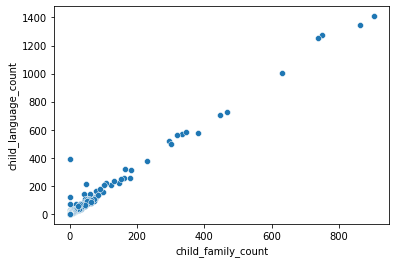

In [8]:
sb.scatterplot(x='child_family_count',y='child_language_count',data=df_languoid)

/home/aswin/ml/my_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


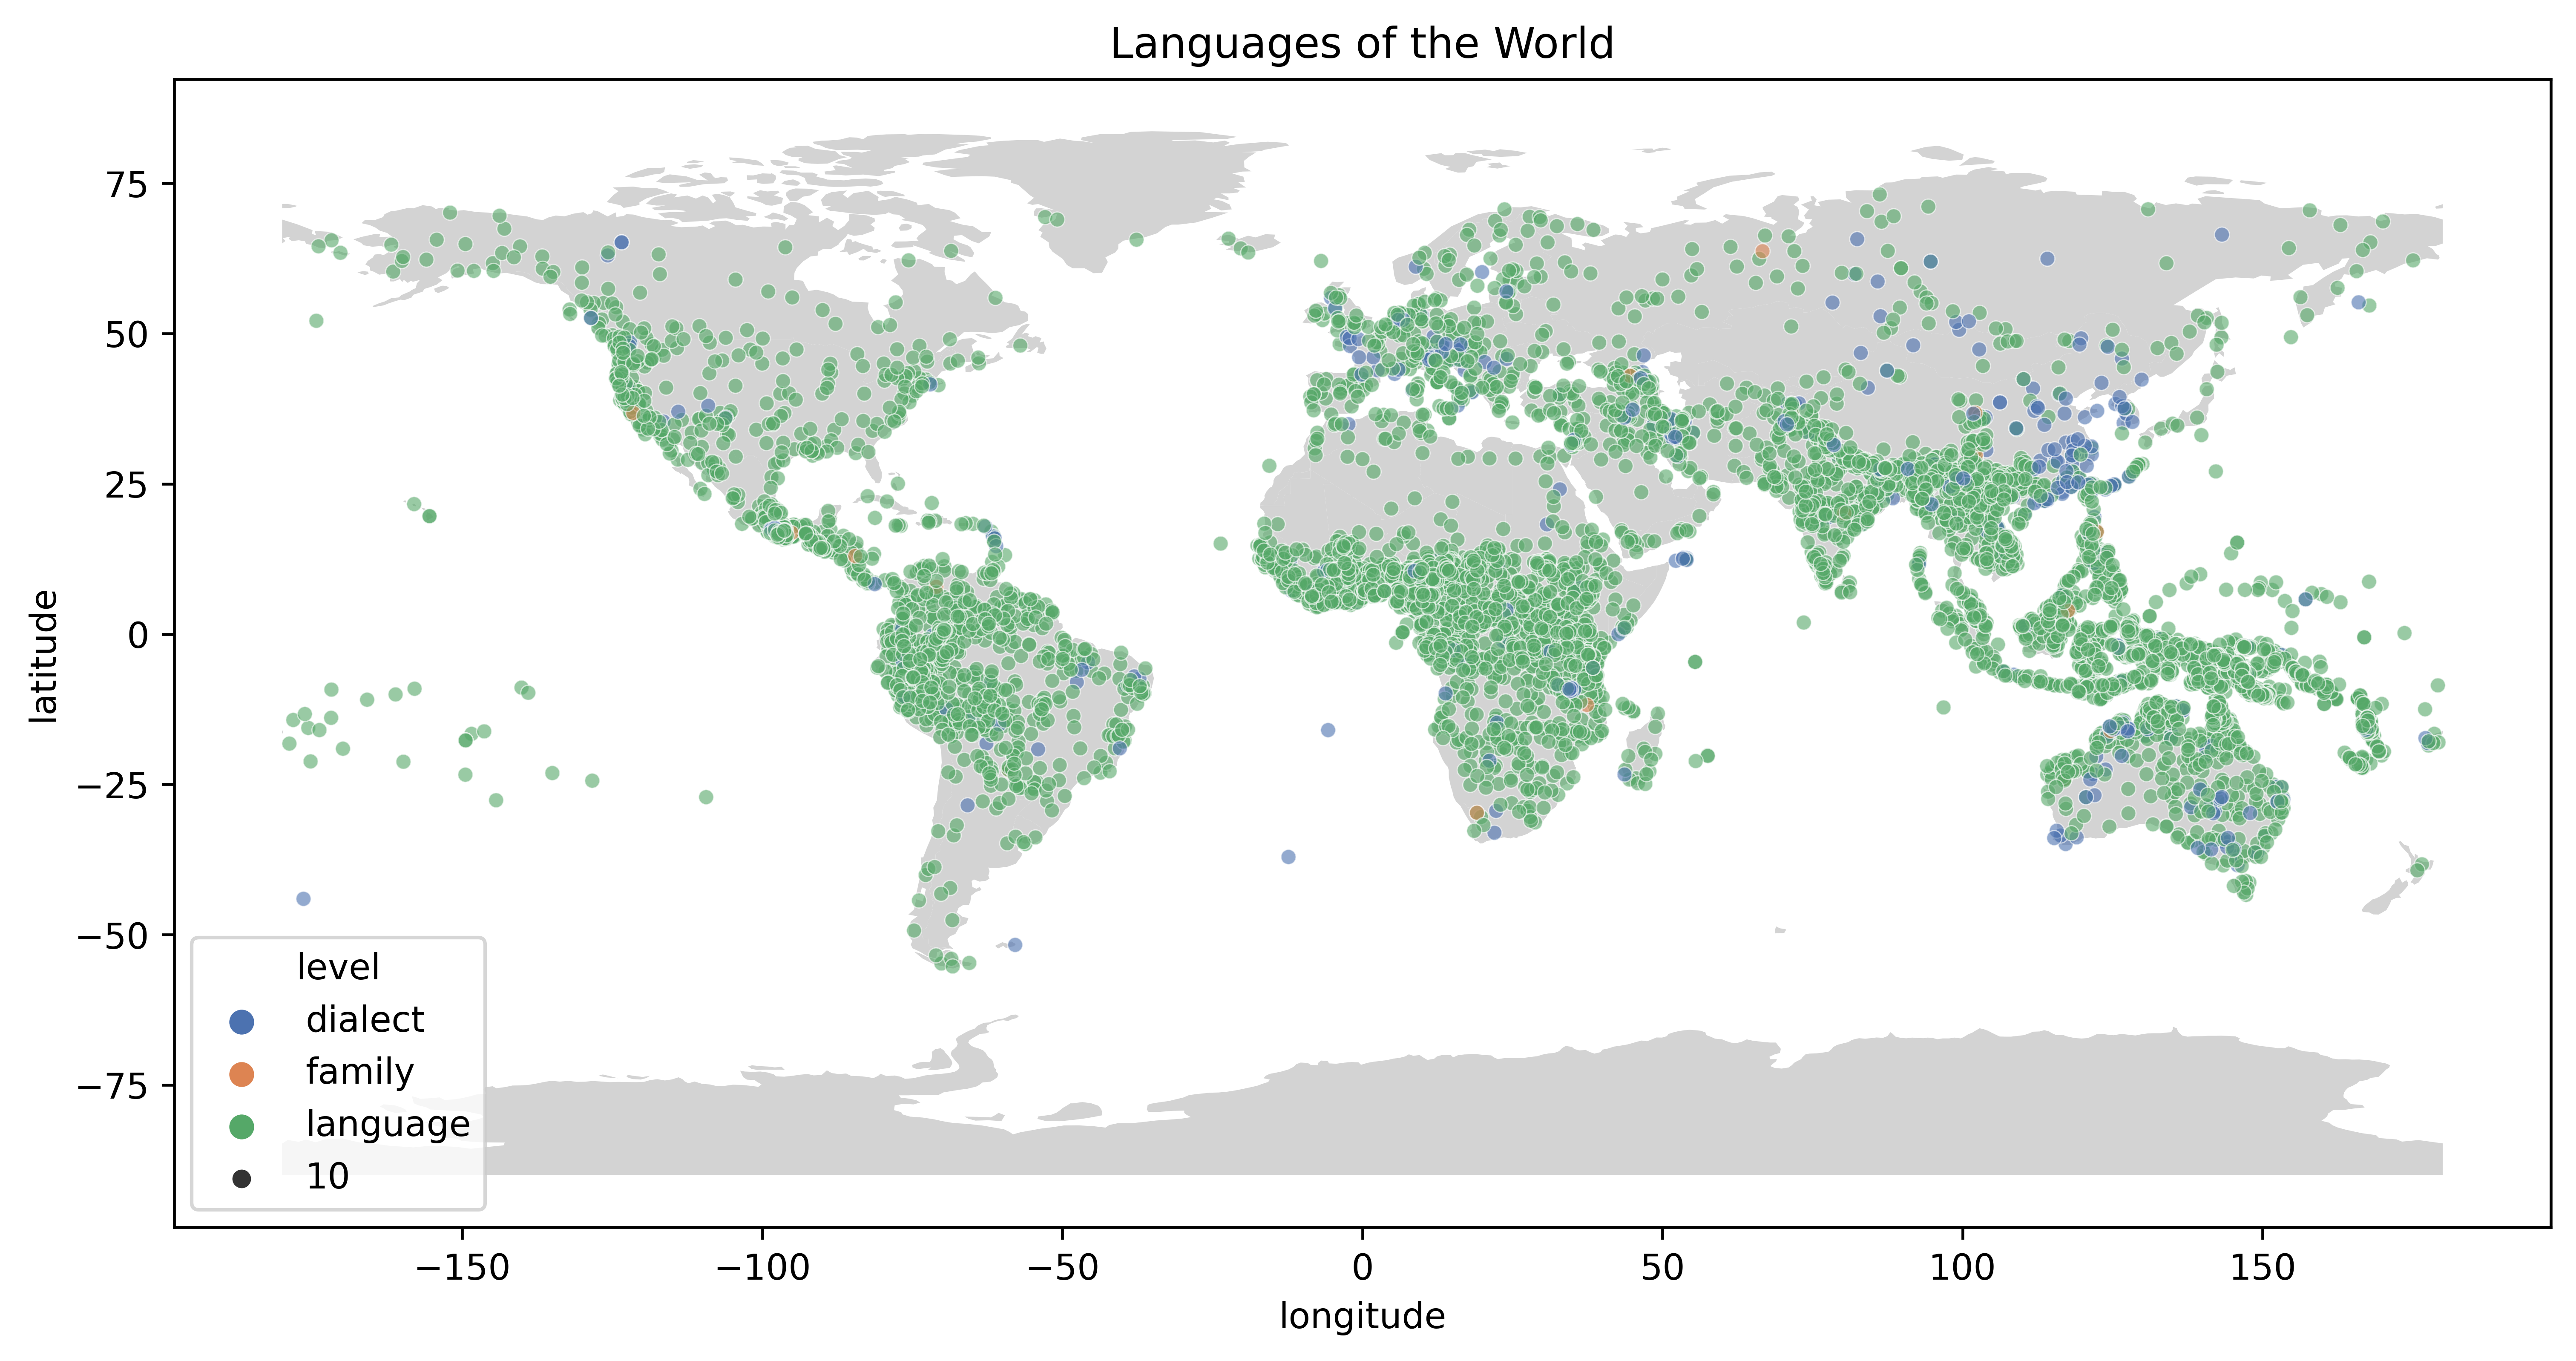

In [9]:
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6),dpi=600)
worldmap.plot(color="lightgrey", ax=ax)

# Plotting our Impact Energy data with a color map
x = df_languoid['longitude'].dropna()
y = df_languoid['latitude'].dropna()
z = df_languoid[df_languoid['longitude'].notnull()]['child_dialect_count']
#plt.scatter(x, y, s=20*z, c=z, alpha=0.6, vmin=0, vmax=threshold,
            #cmap='autumn')
sb.scatterplot(x,y,alpha=0.6,size=10,data=df_languoid,hue='level',palette='deep');
ax.set_title('Languages of the World')
#ax.legend()
fig.savefig('languages_world.png')
#plt.colorbar(label='PK')

In [10]:
df_southasia = df_languoid[df_languoid['latitude'].between(4,40) & df_languoid['longitude'].between(60,100)]
#df_southasia['longitude'].dropna()
#df_southasia['child_dialect_count']
df_southasia['family_id'].nunique()

17

In [11]:
df_southasia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 93 to 26414
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    886 non-null    object 
 1   family_id             881 non-null    object 
 2   parent_id             881 non-null    object 
 3   name                  886 non-null    object 
 4   bookkeeping           886 non-null    bool   
 5   level                 886 non-null    object 
 6   latitude              886 non-null    float64
 7   longitude             886 non-null    float64
 8   iso639P3code          798 non-null    object 
 9   description           0 non-null      float64
 10  markup_description    0 non-null      float64
 11  child_family_count    886 non-null    int64  
 12  child_language_count  886 non-null    int64  
 13  child_dialect_count   886 non-null    int64  
 14  country_ids           874 non-null    object 
dtypes: bool(1), float64(

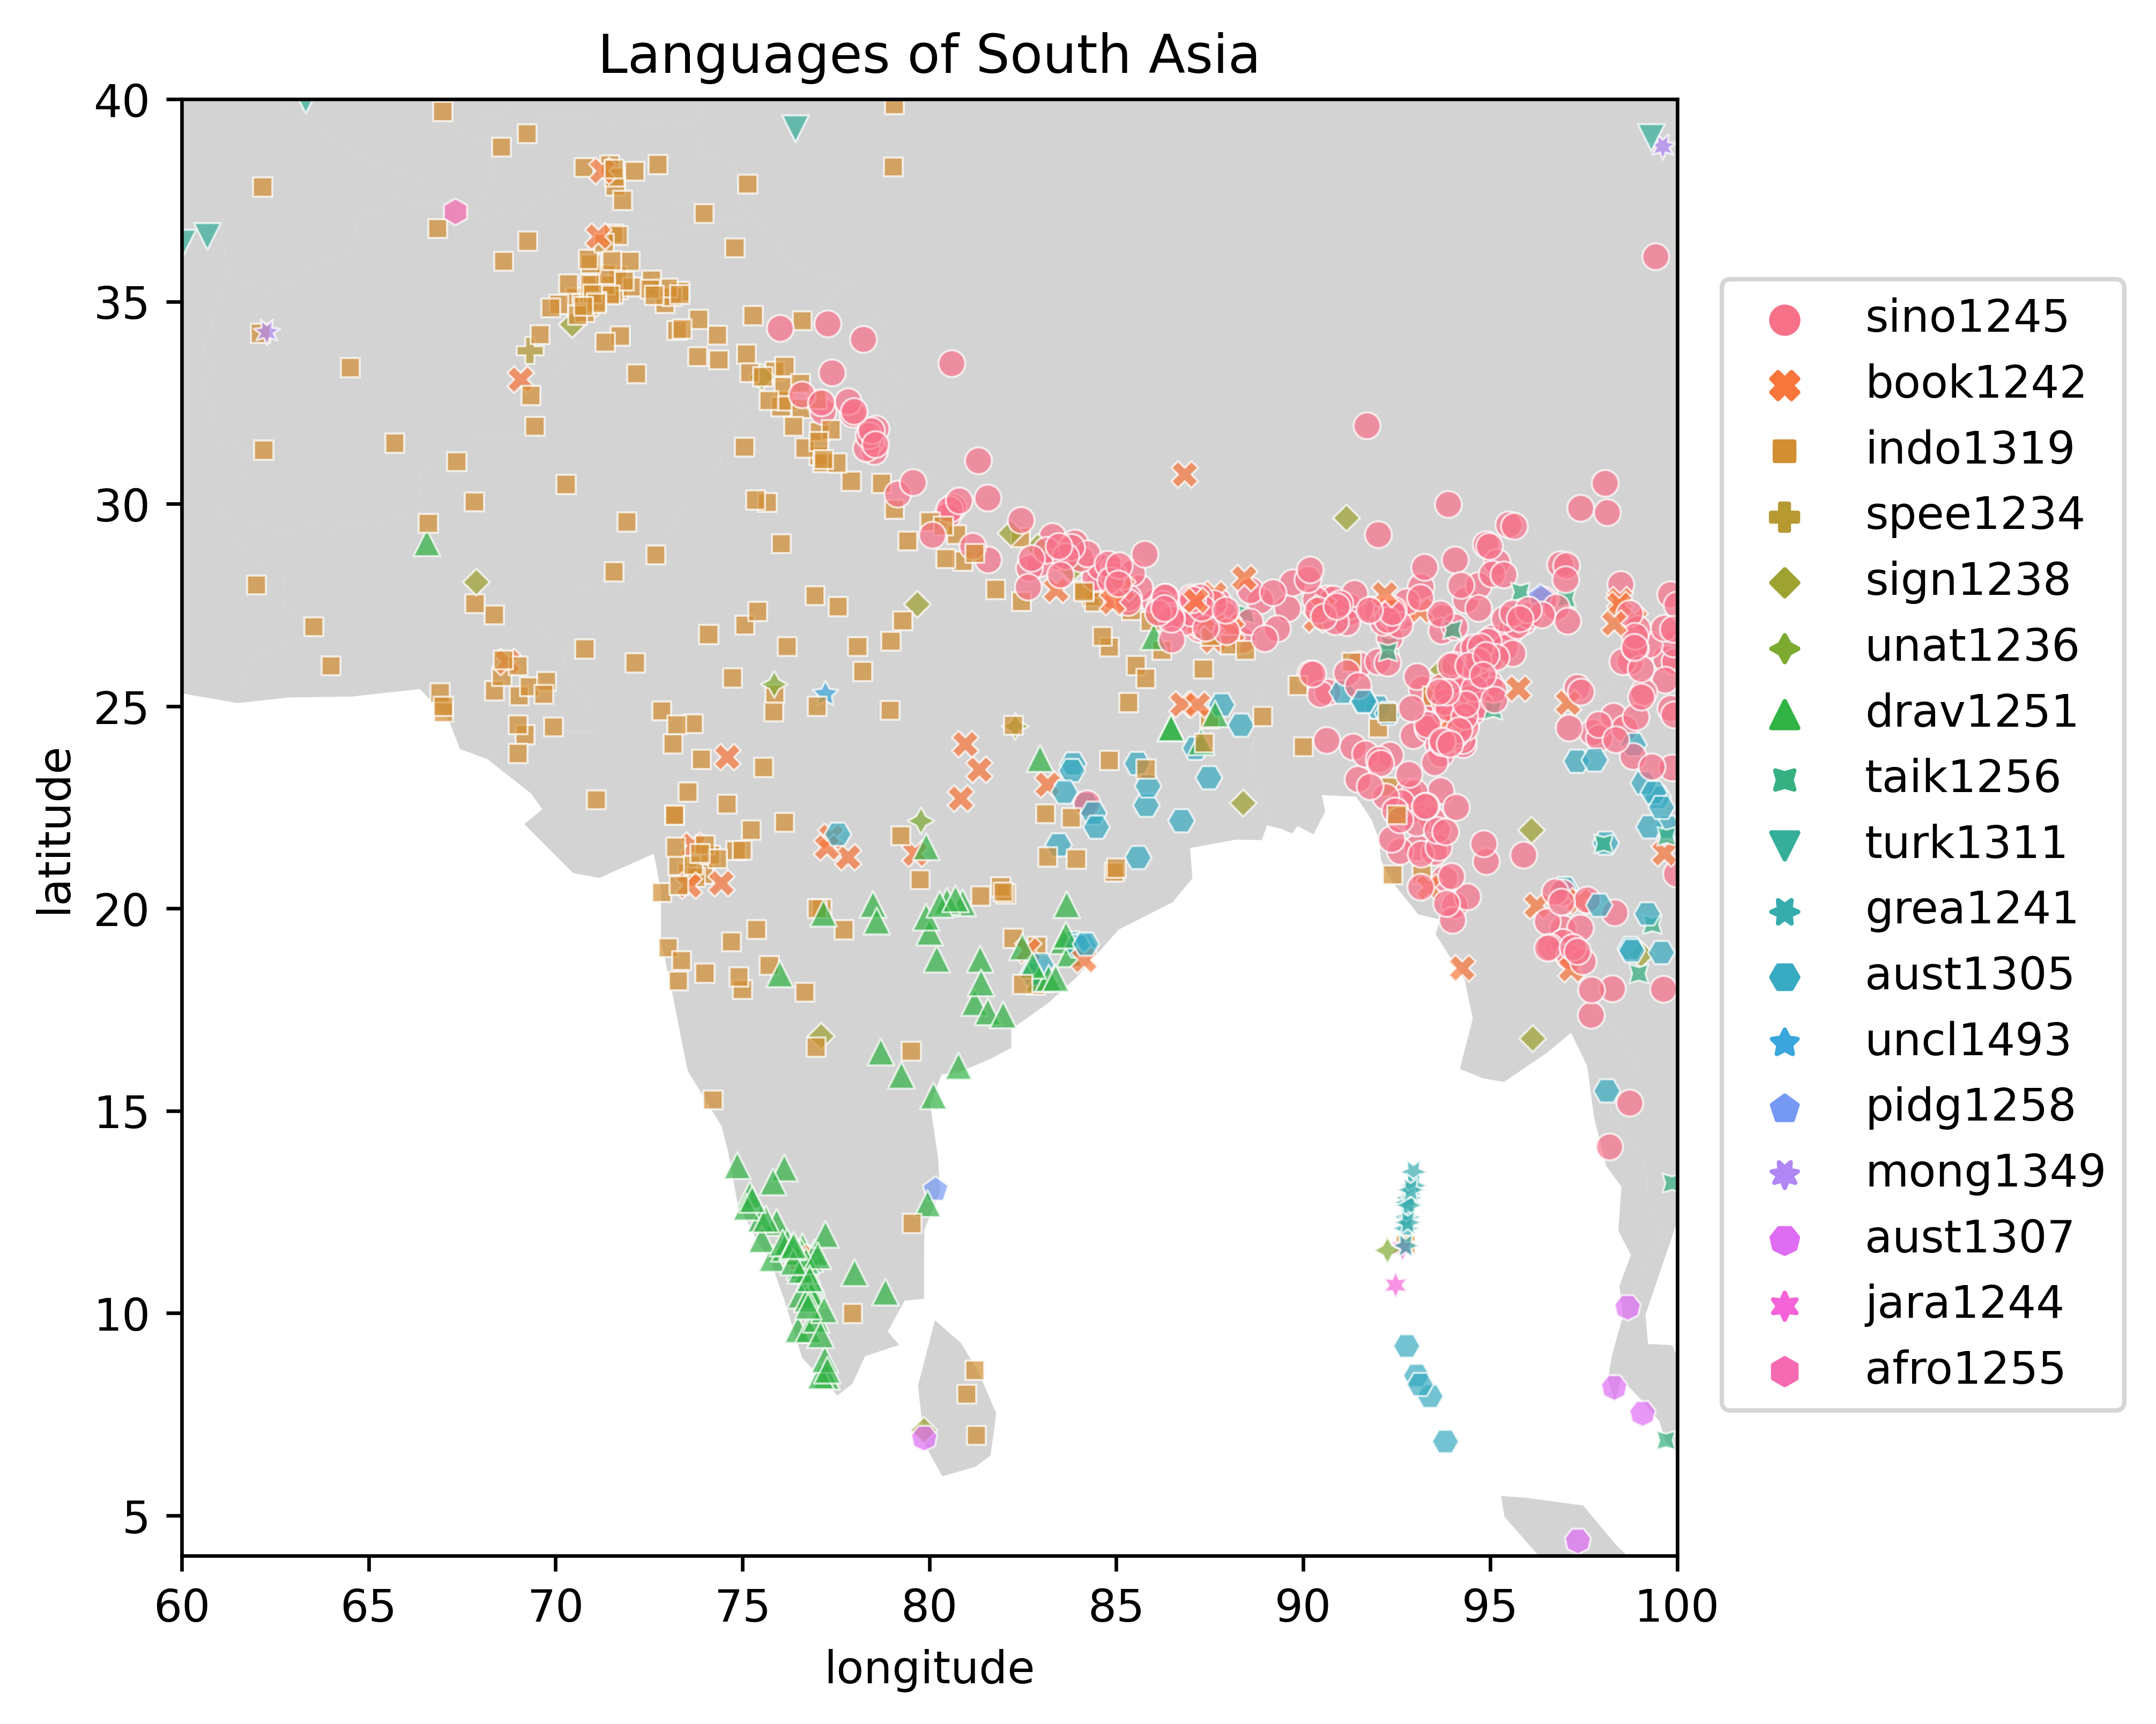

In [12]:
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
india = worldmap[worldmap.continent == 'Asia']
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(9, 6),dpi=600)
india.plot(color="lightgrey", ax=ax)
ax.set_xlim(60,100)
ax.set_ylim(4,40)

# Plotting our Impact Energy data with a color map
xx = df_southasia['longitude']
yy = df_southasia['latitude']
zz = df_southasia['child_dialect_count']
#plt.scatter(x, y, s=20*z, c=z, alpha=0.6, vmin=0, vmax=threshold,
            #cmap='autumn')
my_palette1 = sb.color_palette(cc.glasbey, n_colors=25)    
sb.scatterplot(x='longitude',y='latitude',style='family_id',alpha=0.7,data=df_southasia,hue='family_id');
ax.set_title('Languages of South Asia')

ax.legend(loc=(1.03,0.1))
#fig.savefig('south_asia_languages.png')
fig.savefig('languages_south_asia.png')
#plt.colorbar(label='PK')

In [38]:
df_southasia[['child_dialect_count','child_family_count','child_language_count']].describe()

child_dialect_count  child_family_count  child_language_count
count           886.000000          886.000000            886.000000
mean              1.851016            0.001129              0.009029
std               3.589428            0.033596              0.157408
min               0.000000            0.000000              0.000000
25%               0.000000            0.000000              0.000000
50%               0.000000            0.000000              0.000000
75%               2.000000            0.000000              0.000000
max              32.000000            1.000000              3.000000

In [14]:
df_southasia_major = df_southasia[df_southasia['child_dialect_count'] + df_southasia['child_language_count']>9]
df_southasia_major.sort_values('child_dialect_count',ascending=False)

id family_id parent_id               name  bookkeeping     level  \
10783  kony1248  sino1245  kony1247        Konyak Naga        False  language   
10194  kham1282  sino1245  kham1299      Khams Tibetan        False  language   
22473  tase1235  sino1245  tang1379        Pangwa Naga        False  language   
3223   bund1253  indo1319  bund1252            Bundeli        False  language   
20571  shin1264  indo1319  shin1270              Shina        False  language   
22281  tami1289  drav1251  tami1300              Tamil        False  language   
4268   chon1285  sino1245  east2771              Choni        False  language   
22627  telu1262  drav1251  telu1265             Telugu        False  language   
12874  mait1250  indo1319  mait1254           Maithili        False  language   
2436   bhil1251  indo1319  bhil1254              Bhili        False  language   
16068  nort2665  indo1319  west2387  Northwest Pashayi        False  language   
2442   bhoj1244  indo1319  bhoj1246           Bhojpuri        False  language   
22868  tibe1272  sino1245  cent2346            Tibetan        False  language   
6784   garh1243  indo1319  cent1977           Garhwali        False  language   
10761  konk1267  indo1319  west2963     Konkan Marathi        False  language   
1311   awad1243  indo1319  awad1245             Awadhi        False  language   
2303   beng1280  indo1319  gaud1238            Bengali        False  language   
19246  rawa1265  sino1245  nung1293             Rawang        False  language   
18721  pnar1238  aust1305  khas1275               Pnar        False  language   
13075  malv1243  indo1319  bhil1254              Malvi        False  language   
20626  shug1248  indo1319  shug1253            Shughni        False  language   
12972  mala1464  drav1251  mala1541          Malayalam        False  language   
5498   east1436  indo1319  indo1310     Eastern Pahari        False    family   
22785  thad1238  sino1245  thad1239         Thado Chin        False  language   
16722  nucl1305  drav1251  kann1255            Kannada        False  language   
19195  rang1267  sino1245  oldk1252              Halam        False  language   
24260  varh1239  indo1319  mode1268    Varhadi-Nagpuri        False  language   
16050  nort2646  indo1319  nucl1276    Northern Pashto        False  language   
15927  noct1238  sino1245  kony1249         Nocte Naga        False  language   
9872   kati1270  indo1319  nuri1243               Katë        False  language   
22175  taji1245  indo1319  taji1250              Tajik        False  language   
12812  maha1287  indo1319  nucl1728      Mahasu Pahari        False  language   
6794   garo1247  sino1245  bodo1279               Garo        False  language   
739    anga1288  sino1245  anga1287        Angami Naga        False  language   

        latitude  longitude iso639P3code  description  markup_description  \
10783  26.682300  95.059800          nbe          NaN                 NaN   
10194  31.931300  91.706200          khg          NaN                 NaN   
22473  27.257200  96.385500          nst          NaN                 NaN   
3223   24.898200  78.954200          bns          NaN                 NaN   
20571  34.651500  75.287000          scl          NaN                 NaN   
22281  10.520219  78.825989          tam          NaN                 NaN   
4268   27.755200  99.825500          cda          NaN                 NaN   
22627  16.452900  78.702400          tel          NaN                 NaN   
12874  26.381700  86.221100          mai          NaN                 NaN   
2436   20.850000  73.959200          bhb          NaN                 NaN   
16068  34.931823  70.087592          glh          NaN                 NaN   
2442   26.458455  84.817115          bho          NaN                 NaN   
22868  28.368100  90.187200          bod          NaN                 NaN   
6784   30.506100  78.720100          gbm          NaN                 NaN   
10761  18.404000  73.9

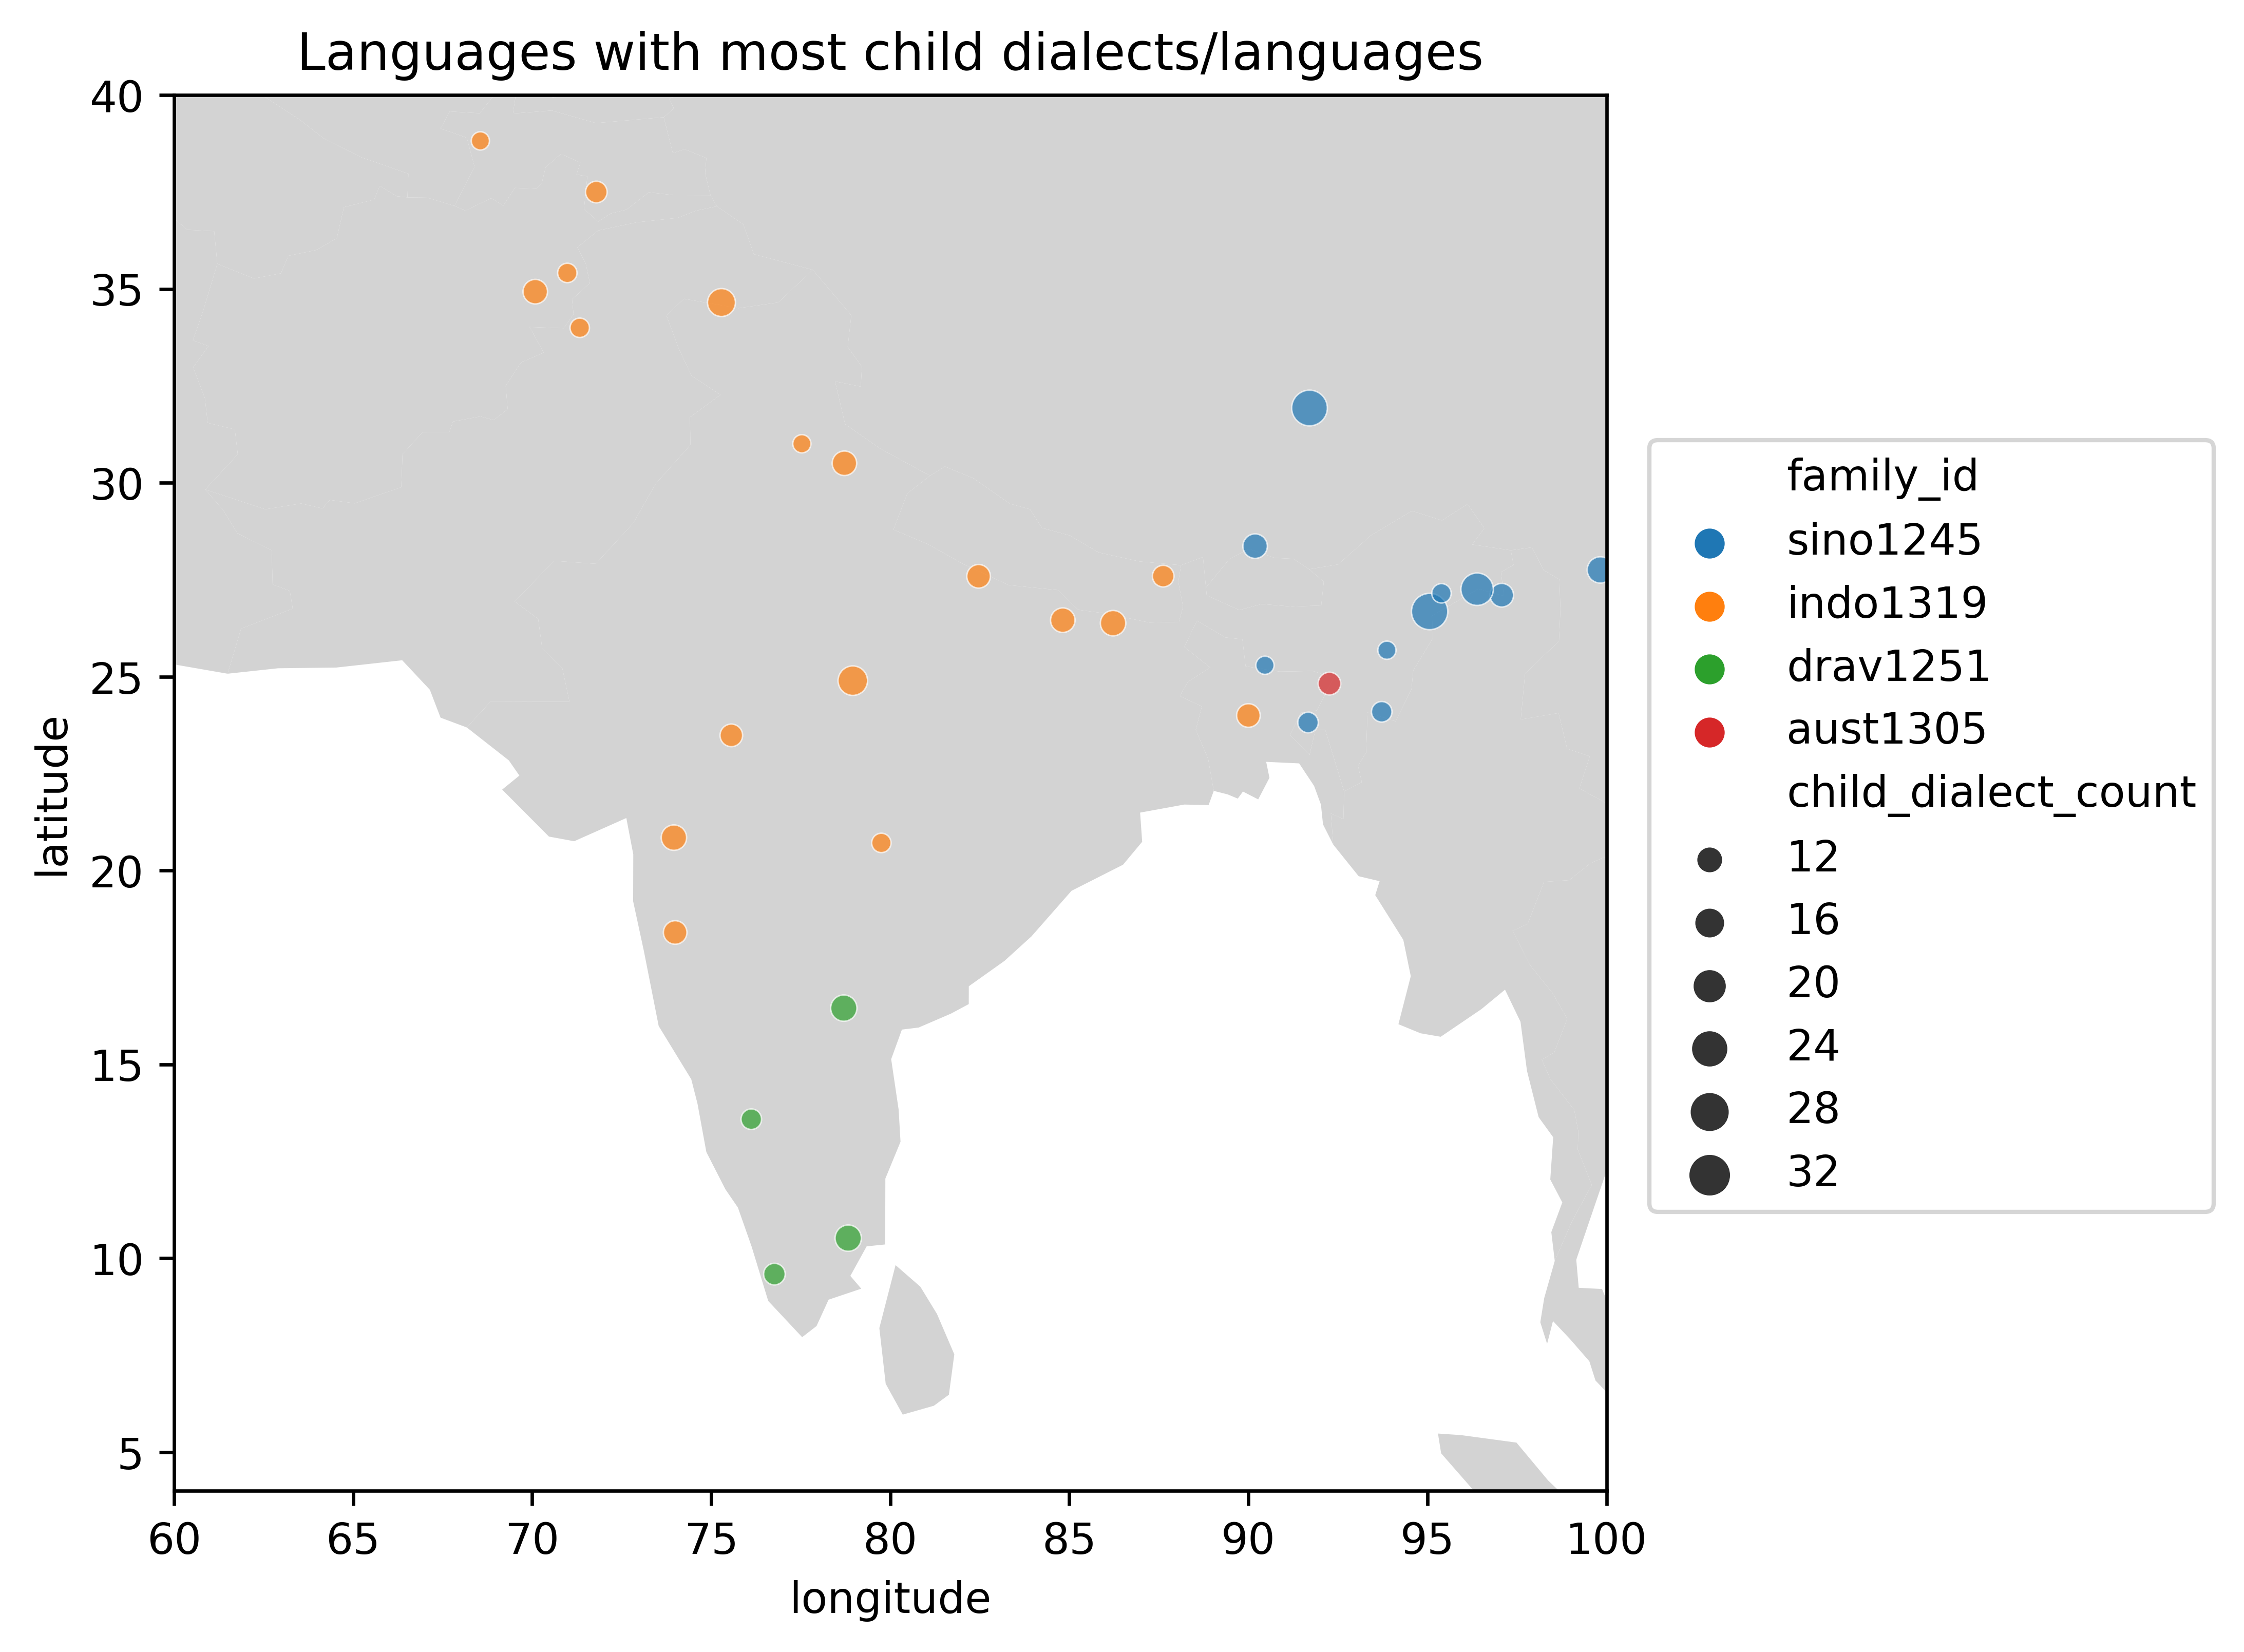

In [16]:
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
india = worldmap[worldmap.continent == 'Asia']
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(9, 6),dpi=600)
india.plot(color="lightgrey", ax=ax)
ax.set_xlim(60,100)
ax.set_ylim(4,40)

# Plotting our Impact Energy data with a color map
xx = df_southasia_major['longitude']
yy = df_southasia_major['latitude']
zz = df_southasia_major['child_dialect_count']
#plt.scatter(x, y, s=20*z, c=z, alpha=0.6, vmin=0, vmax=threshold,
            #cmap='autumn')
my_palette1 = sb.color_palette(cc.glasbey, n_colors=25)    
sb.scatterplot(x='longitude',y='latitude',alpha=0.7,data=df_southasia_major,hue='family_id',size=zz);
ax.set_title('Languages with most child dialects/languages')

#Annotations 
#long_list = df_southasia_major['longitude'].to_list()
#lat_list = df_southasia_major['latitude'].to_list()
#name_list = df_southasia_major['name'].to_list()
#ax.annotate(name_list,(long_list,lat_list))

#Overall Fig params
ax.legend(loc=(1.03,0.2))
fig.savefig('major_languages_south_asia.png')
#plt.colorbar(label='PK')

In [80]:
#long_list = df_southasia_major['longitude'].to_list()
#lat_list = df_southasia_major['latitude'].to_list()
#name_list = df_southasia_major['name'].to_list()